In [2]:
!pwd

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
/mnt/c/Users/a1959846/PycharmProjects/auto_sec_hf


In [ ]:
import pandas as pd
from Levenshtein import ratio
import re


# Pattern for CVE identifiers
pattern = r"CVE-\d{4}-\d{4,7}"


df_hf = pd.read_csv('./inference/distilbert/hf_disc.csv')
df_hf = df_hf.drop_duplicates(subset=["full_content"]).rename(columns={"full_content": "full_content"})
print(len(df_hf))

df_ghd = pd.read_csv('./inference/distilbert/gh_disc.csv')
df_ghd = df_ghd.drop_duplicates(subset=["discussion_title", "content"])
df_ghd['discussion_title_content'] = df_ghd['discussion_title'].astype(str) + '\n' + df_ghd['content'].astype(str)
df_ghd = df_ghd.rename(columns={"discussion_title_content": "full_content"})
print(len(df_ghd))

df_ghi = pd.read_csv('./inference/distilbert/gh_issues_distilbert_filtered.csv')
df_ghi = df_ghi.drop_duplicates(subset=["full_comment"]).rename(columns={"full_comment": "full_content"})
print(len(df_ghi))

In [9]:
df_ghd

,repo_name,discussion_number,discussion_title,content,url,is_kw,Unnamed: 6,full_content
0,01-ai/Yi,361,inference issues on SageMaker studion,I managed to deploy Yi-VL-34B on instance_type...,https://github.com/01-ai/Yi/discussions/361,0,NaN,inference issues on SageMaker studion\nI manag...
1,34j/so-vits-svc-fork,118,Can this be used for TTS somehow or only Voice...,see title\nIt is voice to voice only\nCombine ...,https://github.com/34j/so-vits-svc-fork/discus...,0,NaN,Can this be used for TTS somehow or only Voice...
2,34j/so-vits-svc-fork,244,How to uninstall the svcg package?,I just want to use remove all the packages tha...,https://github.com/34j/so-vits-svc-fork/discus...,0,NaN,How to uninstall the svcg package?\nI just wan...
3,34j/so-vits-svc-fork,277,ERROR: Could not build wheels for fairseq,"when I use the command ""pip install -U so-vits...",https://github.com/34j/so-vits-svc-fork/discus...,0,NaN,ERROR: Could not build wheels for fairseq\nwhe...
4,34j/so-vits-svc-fork,377,"RuntimeError(""Distributed package doesn't have...",Everything goes fine for me until I try to tra...,https://github.com/34j/so-vits-svc-fork/discus...,0,NaN,"RuntimeError(""Distributed package doesn't have..."
...,...,...,...,...,...,...,...,...
2779,yoshitomo-matsubara/torchdistill,281,How should I interpret the accuracies?,"Hi,\nI faced something strange,\nafter several...",https://github.com/yoshitomo-matsubara/torchdi...,0,NaN,"How should I interpret the accuracies?\nHi,\nI..."
2780,yoshitomo-matsubara/torchdistill,336,AttributeError,"I have this Error in line 250, -model_t.eval()...",https://github.com/yoshitomo-matsubara/torchdi...,0,NaN,"AttributeError\nI have this Error in line 250,..."
2781,yoshitomo-matsubara/torchdistill,390,Finding the Effective Batchsize,"Hi,\nI was wondering how we should interpret t...",https://github.com/yoshitomo-matsubara/torchdi...,0,NaN,"Finding the Effective Batchsize\nHi,\nI was wo..."
2782,yukiarimo/yuna-ai,6,Release v4.0,Improved stability\nFull refactoring of main f...,https://github.com/yukiarimo/yuna-ai/discussio...,0,NaN,Release v4.0\nImproved stability\nFull refacto...


In [5]:
pattern = r"CVE-\d{4}-\d{4,7}"

all_matches = []
count_matches = 0

for df in [df_hf, df_ghd, df_ghi]:
    matches = df['full_content'].str.findall(r"CVE-\d{4}-\d{4,7}")
    matches = matches[matches.apply(lambda x: len(x) > 0)]
    count_matches += matches.shape[0]
    all_matches.extend(matches.explode().tolist())
print(all_matches)
print("Number of rows containing CVE patterns:", count_matches)

# print(count_matches)
df_cve = pd.DataFrame(all_matches, columns=['cve'])
df_cve



['CVE-2024-34359', 'CVE-2023-52323', 'CVE-2024-3660', 'CVE-2022-45907', 'CVE-2022-45907', 'CVE-2007-4559', 'CVE-2007-4559', 'CVE-2007-4559', 'CVE-2007-4559', 'CVE-2007-4559', 'CVE-2024-11392', 'CVE-2024-34359', 'CVE-2024-34359', 'CVE-2024-4940', 'CVE-2024-4940', 'CVE-2024-4940', 'CVE-2022-29958', 'CVE-2021-45958', 'CVE-2020-29652', 'CVE-2021-33194', 'CVE-2021-43565', 'CVE-2022-27191', 'CVE-2022-27664', 'CVE-2022-41723', 'CVE-2022-47695', 'CVE-2023-39325', 'CVE-2023-44487', 'CVE-2024-24762', 'CVE-2024-25062', 'CVE-2020-11022', 'CVE-2020-11022', 'CVE-2023-52433', 'CVE-2023-0461', 'CVE-2024-27397', 'CVE-2023-21400', 'CVE-2024-26921', 'CVE-2023-20569', 'CVE-2024-26800', 'CVE-2023-30570', 'CVE-2023-28655', 'CVE-2023-38545', 'CVE-2023-47248', 'CVE-2023-41626', 'CVE-2023-41626', 'CVE-2023-5981', 'CVE-2023-47038', 'CVE-2023-39804', 'CVE-2023-5981', 'CVE-2023-47038', 'CVE-2023-39804', 'CVE-2020-22916', 'CVE-2023-4911', 'CVE-2023-4911', 'CVE-2020-22916', 'CVE-2022-4415', 'CVE-2023-28154', 'CVE-2

,cve
0,CVE-2024-34359
1,CVE-2023-52323
2,CVE-2024-3660
3,CVE-2022-45907
4,CVE-2022-45907
...,...
1031,CVE-2017-20165
1032,CVE-2022-45907
1033,CVE-2022-45907
1034,CVE-2019-16249


In [19]:
print(len(df_cve))
df_cve = df_cve.drop_duplicates()
print(len(df_cve))
df_cve

518
518


,cve
0,CVE-2024-34359
1,CVE-2023-52323
2,CVE-2024-3660
3,CVE-2022-45907
5,CVE-2007-4559
...,...
1018,CVE-2014-4114
1019,CVE-2022-21725
1023,CVE-2024-29180
1025,CVE-2021-33587


In [ ]:
import requests

def fetch_cve_record(cve_id):
    url = f"https://cveawg.mitre.org/api/cve/{cve_id}"
    response = None
    try:
        resp = requests.get(url, timeout=30)
        if resp.status_code == 200:
            response =  resp.json()
        else:
            response = None
    except Exception as e:
        response = None

    print(response)
    return response

df_cve['cve_record'] = df_cve['cve'].apply(fetch_cve_record)
df_cve.to_csv(
     './cve.csv',
        index=False
)

In [35]:
def fetch_cve_record(cve_id):
    print(cve_id)
    url = f"https://services.nvd.nist.gov/rest/json/cves/2.0?cveId={cve_id}"
    response = None
    try:
        resp = requests.get(url, timeout=30)
        if resp.status_code == 200:
            response =  resp.json()
        else:
            response = None
    except Exception as e:
        print(e)
        response = None
    print(response)
    return response


In [ ]:
df_cve['cve_record_nvd'] = df_cve['cve'].apply(fetch_cve_record)
df_cve.to_csv(
     './cve.csv',
        index=False
)

In [40]:

# Filter records where cve_record_nvd is None and rerun fetch_cve_record
mask = df_cve['cve_record_nvd'].isna()
print(len(mask))
df_cve.loc[mask, 'cve_record_nvd'] = df_cve.loc[mask, 'cve'].apply(fetch_cve_record)
df_cve.to_csv(
     './cve.csv',
        index=False
)

518
CVE-2024-2004
{'resultsPerPage': 1, 'startIndex': 0, 'totalResults': 1, 'format': 'NVD_CVE', 'version': '2.0', 'timestamp': '2025-06-06T00:16:44.732', 'vulnerabilities': [{'cve': {'id': 'CVE-2024-2004', 'sourceIdentifier': '2499f714-1537-4658-8207-48ae4bb9eae9', 'published': '2024-03-27T08:15:41.173', 'lastModified': '2024-11-21T09:08:47.413', 'vulnStatus': 'Awaiting Analysis', 'cveTags': [], 'descriptions': [{'lang': 'en', 'value': 'When a protocol selection parameter option disables all protocols without adding any then the default set of protocols would remain in the allowed set due to an error in the logic for removing protocols. The below command would perform a request to curl.se with a plaintext protocol which has been explicitly disabled.      curl --proto -all,-http http://curl.se  The flaw is only present if the set of selected protocols disables the entire set of available protocols, in itself a command with no practical use and therefore unlikely to be encountered in re

In [55]:
def get_cwe(nvd_cve_record):

    cwe = set()
    vuls = nvd_cve_record.get('vulnerabilities', [])
    for vul in vuls:
        cve = vul.get("cve", {})
        print(cve["id"])
        weaknesses = cve.get("weaknesses")
        if not weaknesses:
            continue
        for weakness in weaknesses:
            cwe_desc = weakness.get("description")
            if cwe_desc:
                for cwe_desc in cwe_desc:
                    cwe_id = cwe_desc.get("value")
                    if cwe_id:
                        cwe.add(cwe_id)
        print(vul["cve"]["id"], list(cwe))
    return list(cwe)

def get_cve_status(nvd_cve_record):
    status = None
    vuls = nvd_cve_record.get('vulnerabilities', [])
    for vul in vuls:
        cve = vul.get("cve", {})
        print(cve["id"])
        status = cve.get("vulnStatus")
    return status

df_cve['cwe'] = df_cve['cve_record_nvd'].apply(get_cwe)
df_cve['cve_status'] = df_cve['cve_record_nvd'].apply(get_cve_status)
df_cve


CVE-2024-34359
CVE-2024-34359 ['CWE-76']
CVE-2023-52323
CVE-2023-52323 ['CWE-203']
CVE-2024-3660
CVE-2022-45907
CVE-2022-45907 ['CWE-94']
CVE-2007-4559
CVE-2007-4559 ['CWE-22']
CVE-2024-11392
CVE-2024-11392 ['CWE-502']
CVE-2024-4940
CVE-2024-4940 ['CWE-601']
CVE-2022-29958
CVE-2022-29958 ['CWE-345']
CVE-2021-45958
CVE-2021-45958 ['CWE-787']
CVE-2020-29652
CVE-2020-29652 ['CWE-476']
CVE-2021-33194
CVE-2021-33194 ['CWE-835']
CVE-2021-43565
CVE-2021-43565 ['NVD-CWE-noinfo']
CVE-2022-27191
CVE-2022-27191 ['NVD-CWE-noinfo']
CVE-2022-27664
CVE-2022-27664 ['NVD-CWE-noinfo']
CVE-2022-41723
CVE-2022-41723 ['NVD-CWE-Other']
CVE-2022-47695
CVE-2022-47695 ['NVD-CWE-noinfo', 'CWE-400']
CVE-2023-39325
CVE-2023-39325 ['CWE-770']
CVE-2023-44487
CVE-2023-44487 ['NVD-CWE-noinfo', 'CWE-400']
CVE-2024-24762
CVE-2024-24762 ['CWE-1333', 'CWE-400']
CVE-2024-25062
CVE-2024-25062 ['CWE-416']
CVE-2020-11022
CVE-2020-11022 ['CWE-79']
CVE-2023-52433
CVE-2023-52433 ['CWE-273']
CVE-2023-0461
CVE-2023-0461 ['CWE-416

,cve,cve_record,cve_record_nvd,cwe,cve_status
0,CVE-2024-34359,"{'dataType': 'CVE_RECORD', 'dataVersion': '5.1...","{'resultsPerPage': 1, 'startIndex': 0, 'totalR...",[CWE-76],Awaiting Analysis
1,CVE-2023-52323,"{'dataType': 'CVE_RECORD', 'dataVersion': '5.1...","{'resultsPerPage': 1, 'startIndex': 0, 'totalR...",[CWE-203],Modified
2,CVE-2024-3660,"{'dataType': 'CVE_RECORD', 'dataVersion': '5.1...","{'resultsPerPage': 1, 'startIndex': 0, 'totalR...",[],Awaiting Analysis
3,CVE-2022-45907,"{'dataType': 'CVE_RECORD', 'dataVersion': '5.1...","{'resultsPerPage': 1, 'startIndex': 0, 'totalR...",[CWE-94],Modified
5,CVE-2007-4559,"{'dataType': 'CVE_RECORD', 'dataVersion': '5.1...","{'resultsPerPage': 1, 'startIndex': 0, 'totalR...",[CWE-22],Deferred
...,...,...,...,...,...
1018,CVE-2014-4114,{'containers': {'cna': {'affected': [{'product...,"{'resultsPerPage': 1, 'startIndex': 0, 'totalR...",[NVD-CWE-noinfo],Deferred
1019,CVE-2022-21725,{'containers': {'cna': {'affected': [{'product...,"{'resultsPerPage': 1, 'startIndex': 0, 'totalR...",[CWE-369],Modified
1023,CVE-2024-29180,"{'dataType': 'CVE_RECORD', 'dataVersion': '5.1...","{'resultsPerPage': 1, 'startIndex': 0, 'totalR...",[CWE-22],Awaiting Analysis
1025,CVE-2021-33587,"{'dataType': 'CVE_RECORD', 'dataVersion': '5.1...","{'resultsPerPage': 1, 'startIndex': 0, 'totalR...",[NVD-CWE-noinfo],Modified


In [ ]:
def fetch_cwe_record(cwe_id):
    id = cwe_id.replace("CWE-", "")
    url = f"https://cwe-api.mitre.org/api/v1/cwe/weakness/{id}"
    result = None
    print(url)
    try:
        resp = requests.get(url, timeout=30,  verify=False)
        if resp.status_code == 200:
            data = resp.json()
            result =  data.get("Weaknesses", [])[0]["Name"] if data.get("Weaknesses") else None
    except Exception as e:
        print(e)
        result = None
    print(result)
    return result

def get_cwe_names(cwe_list):
    if not isinstance(cwe_list, list):
        return []
    return [fetch_cwe_record(cwe_id) for cwe_id in cwe_list]

df_cve['cwe_record'] = df_cve['cwe'].apply(get_cwe_names)
df_cve

/home/allan/.virtualenvs/doc/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cwe-api.mitre.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


{'Weaknesses': [{'ID': '76',
   'Name': 'Improper Neutralization of Equivalent Special Elements',
   'Abstraction': 'Base',
   'Structure': 'Simple',
   'Status': 'Draft',
   'Description': 'The product correctly neutralizes certain special elements, but it improperly neutralizes equivalent special elements.',
   'ExtendedDescription': 'The product may have a fixed list of special characters it believes is complete. However, there may be alternate encodings, or representations that also have the same meaning. For example, the product may filter out a leading slash (/) to prevent absolute path names, but does not account for a tilde (~) followed by a user name, which on some *nix systems could be expanded to an absolute pathname. Alternately, the product might filter a dangerous "-e" command-line switch when calling an external program, but it might not account for "--exec" or other switches that have the same semantics.',
   'LikelihoodOfExploit': 'High',
   'RelatedWeaknesses': [{'Nat

In [87]:
from textwrap import dedent


def format_ref(nvd_cve_record, cwe_id, cwe_record):
    print(cwe_id)
    txt = dedent(
        """
        {cve_id}
        Description: {description}
        Weakness Enumeration: {cwe_id}
        """
    )

    cve_id = ""
    cve_description = ""
    vuls = nvd_cve_record.get('vulnerabilities', [])
    for vul in vuls:
        cve = vul.get("cve", {})
        cve_id = cve.get("id", "")
        cve_description = cve.get("descriptions", [])[0]["value"]


    cwe_str = ", ".join([f"{cwei} {cewr}" for cwei, cewr in zip(list(cwe_id), list(cwe_record))])
    print(cwe_str)
    return txt.format(cve_id=cve_id, description=cve_description, cwe_id=cwe_str)

df_cve['cve_nvd_ref'] = df_cve.apply(lambda row: format_ref(row['cve_record_nvd'], row['cwe'], row['cwe_record']), axis=1)
df_cve

['CWE-76']
CWE-76 Improper Neutralization of Equivalent Special Elements
['CWE-203']
CWE-203 Observable Discrepancy
[]

['CWE-94']
CWE-94 Improper Control of Generation of Code ('Code Injection')
['CWE-22']
CWE-22 Improper Limitation of a Pathname to a Restricted Directory ('Path Traversal')
['CWE-502']
CWE-502 Deserialization of Untrusted Data
['CWE-601']
CWE-601 URL Redirection to Untrusted Site ('Open Redirect')
['CWE-345']
CWE-345 Insufficient Verification of Data Authenticity
['CWE-787']
CWE-787 Out-of-bounds Write
['CWE-476']
CWE-476 NULL Pointer Dereference
['CWE-835']
CWE-835 Loop with Unreachable Exit Condition ('Infinite Loop')
['NVD-CWE-noinfo']
NVD-CWE-noinfo None
['NVD-CWE-noinfo']
NVD-CWE-noinfo None
['NVD-CWE-noinfo']
NVD-CWE-noinfo None
['NVD-CWE-Other']
NVD-CWE-Other None
['NVD-CWE-noinfo', 'CWE-400']
NVD-CWE-noinfo None, CWE-400 Uncontrolled Resource Consumption
['CWE-770']
CWE-770 Allocation of Resources Without Limits or Throttling
['NVD-CWE-noinfo', 'CWE-400']
NVD-

,cve,cve_record,cve_record_nvd,cwe,cve_status,cve_nvd_ref,cwe_record
0,CVE-2024-34359,"{'dataType': 'CVE_RECORD', 'dataVersion': '5.1...","{'resultsPerPage': 1, 'startIndex': 0, 'totalR...",[CWE-76],Awaiting Analysis,\nCVE-2024-34359\nDescription: llama-cpp-pytho...,[Improper Neutralization of Equivalent Special...
1,CVE-2023-52323,"{'dataType': 'CVE_RECORD', 'dataVersion': '5.1...","{'resultsPerPage': 1, 'startIndex': 0, 'totalR...",[CWE-203],Modified,\nCVE-2023-52323\nDescription: PyCryptodome an...,[Observable Discrepancy]
2,CVE-2024-3660,"{'dataType': 'CVE_RECORD', 'dataVersion': '5.1...","{'resultsPerPage': 1, 'startIndex': 0, 'totalR...",[],Awaiting Analysis,\nCVE-2024-3660\nDescription: A arbitrary code...,[]
3,CVE-2022-45907,"{'dataType': 'CVE_RECORD', 'dataVersion': '5.1...","{'resultsPerPage': 1, 'startIndex': 0, 'totalR...",[CWE-94],Modified,\nCVE-2022-45907\nDescription: In PyTorch befo...,[Improper Control of Generation of Code ('Code...
5,CVE-2007-4559,"{'dataType': 'CVE_RECORD', 'dataVersion': '5.1...","{'resultsPerPage': 1, 'startIndex': 0, 'totalR...",[CWE-22],Deferred,\nCVE-2007-4559\nDescription: Directory traver...,[Improper Limitation of a Pathname to a Restri...
...,...,...,...,...,...,...,...
1018,CVE-2014-4114,{'containers': {'cna': {'affected': [{'product...,"{'resultsPerPage': 1, 'startIndex': 0, 'totalR...",[NVD-CWE-noinfo],Deferred,\nCVE-2014-4114\nDescription: Microsoft Window...,[None]
1019,CVE-2022-21725,{'containers': {'cna': {'affected': [{'product...,"{'resultsPerPage': 1, 'startIndex': 0, 'totalR...",[CWE-369],Modified,\nCVE-2022-21725\nDescription: Tensorflow is a...,[Divide By Zero]
1023,CVE-2024-29180,"{'dataType': 'CVE_RECORD', 'dataVersion': '5.1...","{'resultsPerPage': 1, 'startIndex': 0, 'totalR...",[CWE-22],Awaiting Analysis,\nCVE-2024-29180\nDescription: Prior to versio...,[Improper Limitation of a Pathname to a Restri...
1025,CVE-2021-33587,"{'dataType': 'CVE_RECORD', 'dataVersion': '5.1...","{'resultsPerPage': 1, 'startIndex': 0, 'totalR...",[NVD-CWE-noinfo],Modified,\nCVE-2021-33587\nDescription: The css-what pa...,[None]


In [88]:
df_cve.to_csv(
     './cve.csv',
    index=False
)

In [77]:
df_cve

,cve,cve_record,cve_record_nvd,cwe,cve_status,cve_nvd_ref,cwe_record
0,CVE-2024-34359,"{'dataType': 'CVE_RECORD', 'dataVersion': '5.1...","{'resultsPerPage': 1, 'startIndex': 0, 'totalR...",[CWE-76],Awaiting Analysis,\nCVE-2024-34359\nDescription: llama-cpp-pytho...,[Improper Neutralization of Equivalent Special...
1,CVE-2023-52323,"{'dataType': 'CVE_RECORD', 'dataVersion': '5.1...","{'resultsPerPage': 1, 'startIndex': 0, 'totalR...",[CWE-203],Modified,\nCVE-2023-52323\nDescription: PyCryptodome an...,[Observable Discrepancy]
2,CVE-2024-3660,"{'dataType': 'CVE_RECORD', 'dataVersion': '5.1...","{'resultsPerPage': 1, 'startIndex': 0, 'totalR...",[],Awaiting Analysis,\nCVE-2024-3660\nDescription: A arbitrary code...,[]
3,CVE-2022-45907,"{'dataType': 'CVE_RECORD', 'dataVersion': '5.1...","{'resultsPerPage': 1, 'startIndex': 0, 'totalR...",[CWE-94],Modified,\nCVE-2022-45907\nDescription: In PyTorch befo...,[Improper Control of Generation of Code ('Code...
5,CVE-2007-4559,"{'dataType': 'CVE_RECORD', 'dataVersion': '5.1...","{'resultsPerPage': 1, 'startIndex': 0, 'totalR...",[CWE-22],Deferred,\nCVE-2007-4559\nDescription: Directory traver...,[Improper Limitation of a Pathname to a Restri...
...,...,...,...,...,...,...,...
1018,CVE-2014-4114,{'containers': {'cna': {'affected': [{'product...,"{'resultsPerPage': 1, 'startIndex': 0, 'totalR...",[NVD-CWE-noinfo],Deferred,\nCVE-2014-4114\nDescription: Microsoft Window...,[None]
1019,CVE-2022-21725,{'containers': {'cna': {'affected': [{'product...,"{'resultsPerPage': 1, 'startIndex': 0, 'totalR...",[CWE-369],Modified,\nCVE-2022-21725\nDescription: Tensorflow is a...,[Divide By Zero]
1023,CVE-2024-29180,"{'dataType': 'CVE_RECORD', 'dataVersion': '5.1...","{'resultsPerPage': 1, 'startIndex': 0, 'totalR...",[CWE-22],Awaiting Analysis,\nCVE-2024-29180\nDescription: Prior to versio...,[Improper Limitation of a Pathname to a Restri...
1025,CVE-2021-33587,"{'dataType': 'CVE_RECORD', 'dataVersion': '5.1...","{'resultsPerPage': 1, 'startIndex': 0, 'totalR...",[NVD-CWE-noinfo],Modified,\nCVE-2021-33587\nDescription: The css-what pa...,[None]


In [31]:
df_cve.loc[mask, 'cve_record_nvd']

84      None
94      None
129     None
138     None
142     None
        ... 
978     None
983     None
995     None
1018    None
1027    None
Name: cve_record_nvd, Length: 120, dtype: object

In [8]:
mapping_model_links = pd.read_csv(
    './mapping_models_links.csv')
mapping_gh_links = pd.read_csv(
    './mapping_repositories_url.csv')
print(len(mapping_model_links))
print(len(mapping_gh_links))

687653
8972


In [9]:
grouped = df.groupby('repo_name').agg({
    'issue_number': lambda x: list(x),
    'issue_number': 'count'
}).rename(columns={'issue_number': 'issue_count'})

grouped['issues'] = df.groupby('repo_name')['issue_number'].apply(list)
grouped['issue_count'] = df.groupby('repo_name')['issue_number'].count()
grouped = grouped.reset_index()

repo_to_link = dict(zip(mapping_gh_links['repo_name'], mapping_gh_links['github_link']))
grouped['github_link'] = grouped['repo_name'].map(repo_to_link)


# # Find model_id for each repo_name by checking if github_link is in github_links list
def find_model_id(github_link):
    for _, row in mapping_model_links.iterrows():
        links = [link.strip() for link in row['github_links'].strip('[]').split(',')] if isinstance(row['github_links'],
                                                                                                    str) else []
        if github_link in links:
            return row['model_id']
    return None


#
grouped['model_id'] = grouped['github_link'].apply(find_model_id)
# grouped

#
# # Create project_name
grouped['project_name'] = grouped['model_id'].astype(str) + '_' + grouped['repo_name']
#
# # Reorder columns
final_df = grouped[['project_name', 'model_id', 'repo_name', 'github_link', 'issues', 'issue_count']]
final_df.head()


,project_name,model_id,repo_name,github_link,issues,issue_count
0,01-ai/Yi-34B_01-ai/Yi,01-ai/Yi-34B,01-ai/Yi,https://github.com/01-ai/Yi,"[623, 610, 600, 596, 595, 594, 593, 571, 563, ...",61
1,01-ai/Yi-Coder-9B-Chat_01-ai/Yi-Coder,01-ai/Yi-Coder-9B-Chat,01-ai/Yi-Coder,https://github.com/01-ai/Yi-Coder,[5],1
2,notstoic/pygmalion-13b-4bit-128g_0cc4m/GPTQ-fo...,notstoic/pygmalion-13b-4bit-128g,0cc4m/GPTQ-for-LLaMa,https://github.com/0cc4m/GPTQ-for-LLaMa,"[16, 14, 13]",3
3,TheBloke/Wizard-Vicuna-30B-Uncensored-GPTQ_0cc...,TheBloke/Wizard-Vicuna-30B-Uncensored-GPTQ,0cc4m/KoboldAI,https://github.com/0cc4m/KoboldAI,"[75, 54, 52, 51, 45, 44, 42, 37, 30, 28, 26, 2...",22
4,fnlp/AnyGPT-chat_0nutation/SpeechGPT,fnlp/AnyGPT-chat,0nutation/SpeechGPT,https://github.com/0nutation/SpeechGPT,"[60, 54, 49, 42, 40, 22, 19, 7]",8


In [11]:
final_df

,project_name,model_id,repo_name,github_link,issues,issue_count
0,01-ai/Yi-34B_01-ai/Yi,01-ai/Yi-34B,01-ai/Yi,https://github.com/01-ai/Yi,"[623, 610, 600, 596, 595, 594, 593, 571, 563, ...",61
1,01-ai/Yi-Coder-9B-Chat_01-ai/Yi-Coder,01-ai/Yi-Coder-9B-Chat,01-ai/Yi-Coder,https://github.com/01-ai/Yi-Coder,[5],1
2,notstoic/pygmalion-13b-4bit-128g_0cc4m/GPTQ-fo...,notstoic/pygmalion-13b-4bit-128g,0cc4m/GPTQ-for-LLaMa,https://github.com/0cc4m/GPTQ-for-LLaMa,"[16, 14, 13]",3
3,TheBloke/Wizard-Vicuna-30B-Uncensored-GPTQ_0cc...,TheBloke/Wizard-Vicuna-30B-Uncensored-GPTQ,0cc4m/KoboldAI,https://github.com/0cc4m/KoboldAI,"[75, 54, 52, 51, 45, 44, 42, 37, 30, 28, 26, 2...",22
4,fnlp/AnyGPT-chat_0nutation/SpeechGPT,fnlp/AnyGPT-chat,0nutation/SpeechGPT,https://github.com/0nutation/SpeechGPT,"[60, 54, 49, 42, 40, 22, 19, 7]",8
...,...,...,...,...,...,...
3869,huangyuyang/chatglm2-6b-int4.flm_ztxz16/fastllm,huangyuyang/chatglm2-6b-int4.flm,ztxz16/fastllm,https://github.com/ztxz16/fastllm,"[489, 448, 432, 430, 378, 375, 363, 332, 316, ...",21
3870,Fuyucchi/yolov8_animeface_zymk9/yolov5_anime,Fuyucchi/yolov8_animeface,zymk9/yolov5_anime,https://github.com/zymk9/yolov5_anime,[3],1
3871,zzxslp/som-llava-v1.5-13b_zzxslp/SoM-LLaVA,zzxslp/som-llava-v1.5-13b,zzxslp/SoM-LLaVA,https://github.com/zzxslp/SoM-LLaVA,[8],1
3872,timothyakampa/donut-trained-model_zzzDavid/ICD...,timothyakampa/donut-trained-model,zzzDavid/ICDAR-2019-SROIE,https://github.com/zzzDavid/ICDAR-2019-SROIE,"[20, 19, 13, 6, 4, 3, 2]",7


In [12]:
final_df.to_csv(
    './mapping_issues.csv',
    index=False
)

In [24]:

# gh disc
df = pd.read_csv('./inference/distilbert/gh_disc.csv')
grouped_disc = df.groupby('repo_name').agg({
    'discussion_number': lambda x: list(x),
    'discussion_number': 'count'
}).rename(columns={'discussion_number': 'discussion_count'})

grouped_disc['discussions'] = df.groupby('repo_name')['discussion_number'].apply(list)
grouped_disc['discussions_count'] = df.groupby('repo_name')['discussion_number'].count()
grouped_disc = grouped_disc.reset_index()

repo_to_link = dict(zip(mapping_gh_links['repo_name'], mapping_gh_links['github_link']))
grouped_disc['github_link'] = grouped_disc['repo_name'].map(repo_to_link)
# grouped_disc

mapping_model_links["links"] = mapping_model_links["github_links"].apply(
    lambda x: [link.strip() for link in x.strip('[]').split(',')] if isinstance(x, str) else []
)

grouped_disc['model_id'] = grouped_disc['github_link'].apply(
    lambda link: next(
        (row['model_id'] for _, row in mapping_model_links.iterrows() if link in row['links']),
        None
    )
)

grouped_disc


,repo_name,discussion_count,discussions,discussions_count,github_link,model_id
0,01-ai/Yi,1,[361],1,https://github.com/01-ai/Yi,01-ai/Yi-34B
1,34j/so-vits-svc-fork,23,"[118, 244, 277, 377, 379, 472, 510, 548, 555, ...",23,https://github.com/34j/so-vits-svc-fork,megaaziib/hololivemix-so-vits-svc-4.0
2,4darsh-Dev/CogniGaurd,2,"[49, 105]",2,https://github.com/4darsh-Dev/CogniGaurd,4darsh-Dev/CogniBERT-fineTuned-dark-pattern
3,ACEsuit/mace,14,"[161, 183, 213, 232, 286, 287, 337, 532, 552, ...",14,https://github.com/ACEsuit/mace,cyrusyc/mace-universal
4,AI4Finance-Foundation/FinGPT,1,[133],1,https://github.com/AI4Finance-Foundation/FinGPT,FinGPT/fingpt-forecaster_dow30_llama2-7b_lora
...,...,...,...,...,...,...
364,yl4579/StyleTTS2,3,"[68, 93, 155]",3,https://github.com/yl4579/StyleTTS2,hexgrad/Kokoro-82M
365,ymcui/Chinese-LLaMA-Alpaca,1,[690],1,https://github.com/ymcui/Chinese-LLaMA-Alpaca,hfl/chinese-alpaca-lora-7b
366,yoshitomo-matsubara/torchdistill,3,"[281, 336, 390]",3,https://github.com/yoshitomo-matsubara/torchdi...,yoshitomo-matsubara/bert-large-uncased-cola
367,yukiarimo/yuna-ai,1,[6],1,https://github.com/yukiarimo/yuna-ai,yukiarimo/yuna-ai-v3


In [25]:
grouped_disc.to_csv('./mapping_gh.csv',
                    index=False)

In [29]:
# hf disc
df = pd.read_csv('./inference/distilbert/hf_disc.csv')
grouped_disc = df.groupby('model_id').agg({
    'num': lambda x: list(x),
    'num': 'count'
}).rename(columns={'num': 'discussion_count'})

grouped_disc['discussions'] = df.groupby('model_id')['num'].apply(list)
grouped_disc['discussions_count'] = df.groupby('model_id')['num'].count()
grouped_disc = grouped_disc.reset_index()
grouped_disc

grouped_disc.to_csv('./mapping_hf.csv',
                    index=False)

In [115]:
import pandas as pd
import huggingface_hub
hf = pd.read_csv('./mapping_hf.csv')
hf

,model_id,discussion_count,discussions,discussions_count
0,01-ai/Yi-1.5-34B-Chat,3,"[3, 6, 14]",3
1,01-ai/Yi-1.5-34B-Chat-16K,1,[2],1
2,01-ai/Yi-1.5-9B-Chat,2,"[2, 4]",2
3,01-ai/Yi-1.5-9B-Chat-16K,1,[1],1
4,01-ai/Yi-34B,4,"[6, 18, 33, 35]",4
...,...,...,...,...
4631,zhihan1996/DNABERT-S,1,[1],1
4632,zhiqings/dromedary-65b-lora-delta-v0,1,[1],1
4633,zl111/ChatDoctor,1,[4],1
4634,zxhezexin/openlrm-large-obj-1.0,1,[1],1


In [ ]:
hf_api= huggingface_hub.HfApi()
def get_pipeline_from_hf(model_id):
    pipeline = None
    try:
        pipeline = hf_api.model_info(model_id).pipeline_tag
    except Exception as exc:
        print(exc)
    return pipeline

hf["pipeline_tag"] = hf['model_id'].apply(get_pipeline_from_hf)
hf

In [178]:
hf = pd.read_csv("./model_pipeline_tag.csv")
hf

,Unnamed: 0,model_id,discussion_count,discussions,discussions_count,pipeline_tag
0,0,01-ai/Yi-1.5-34B-Chat,3,"[3, 6, 14]",3,text-generation
1,1,01-ai/Yi-1.5-34B-Chat-16K,1,[2],1,text-generation
2,2,01-ai/Yi-1.5-9B-Chat,2,"[2, 4]",2,text-generation
3,3,01-ai/Yi-1.5-9B-Chat-16K,1,[1],1,text-generation
4,4,01-ai/Yi-34B,4,"[6, 18, 33, 35]",4,text-generation
...,...,...,...,...,...,...
4631,4631,zhihan1996/DNABERT-S,1,[1],1,feature-extraction
4632,4632,zhiqings/dromedary-65b-lora-delta-v0,1,[1],1,NaN
4633,4633,zl111/ChatDoctor,1,[4],1,text-generation
4634,4634,zxhezexin/openlrm-large-obj-1.0,1,[1],1,image-to-3d


Subtypes: {'audio', 'cv', 'other', 'nlp', 'rl', 'multimodal', 'tabular'}
{'audio': ['text-to-speech', 'text-to-audio', 'automatic-speech-recognition', 'audio-to-audio', 'audio-classification', 'voice-activity-detection'], 'cv': ['depth-estimation', 'image-classification', 'object-detection', 'image-segmentation', 'text-to-image', 'image-to-text', 'image-to-image', 'image-to-video', 'unconditional-image-generation', 'video-classification', 'text-to-video', 'zero-shot-image-classification', 'mask-generation', 'zero-shot-object-detection', 'text-to-3d', 'image-to-3d', 'image-feature-extraction', 'keypoint-detection'], 'other': ['graph-ml'], 'nlp': ['text-classification', 'token-classification', 'table-question-answering', 'question-answering', 'zero-shot-classification', 'translation', 'summarization', 'feature-extraction', 'text-generation', 'text2text-generation', 'fill-mask', 'sentence-similarity', 'text-ranking'], 'rl': ['reinforcement-learning', 'robotics'], 'multimodal': ['audio-tex

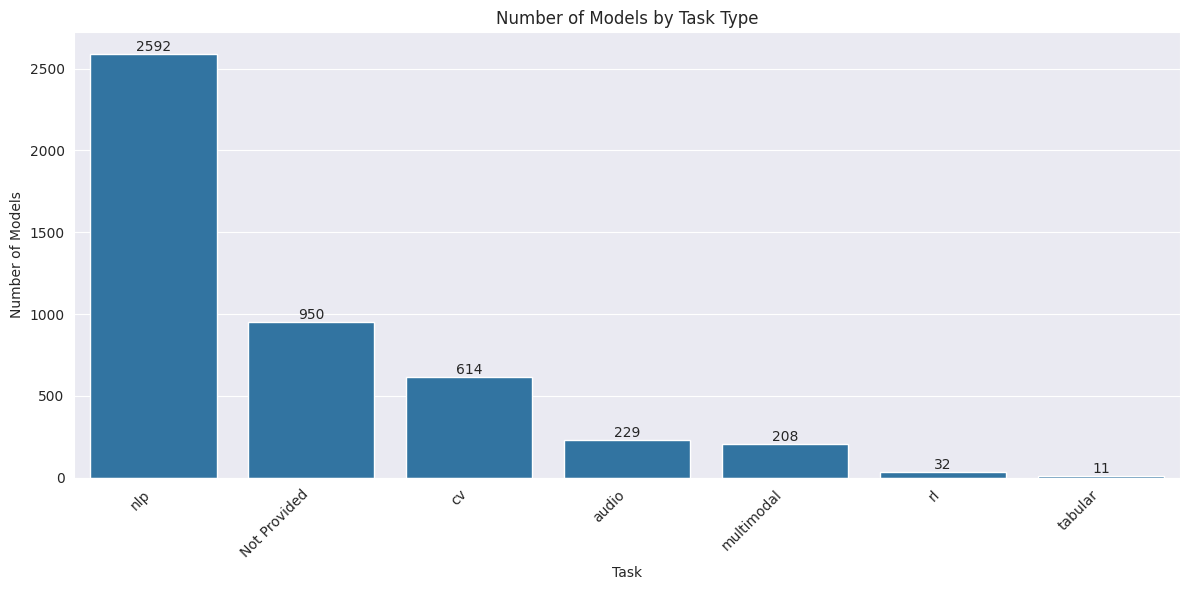

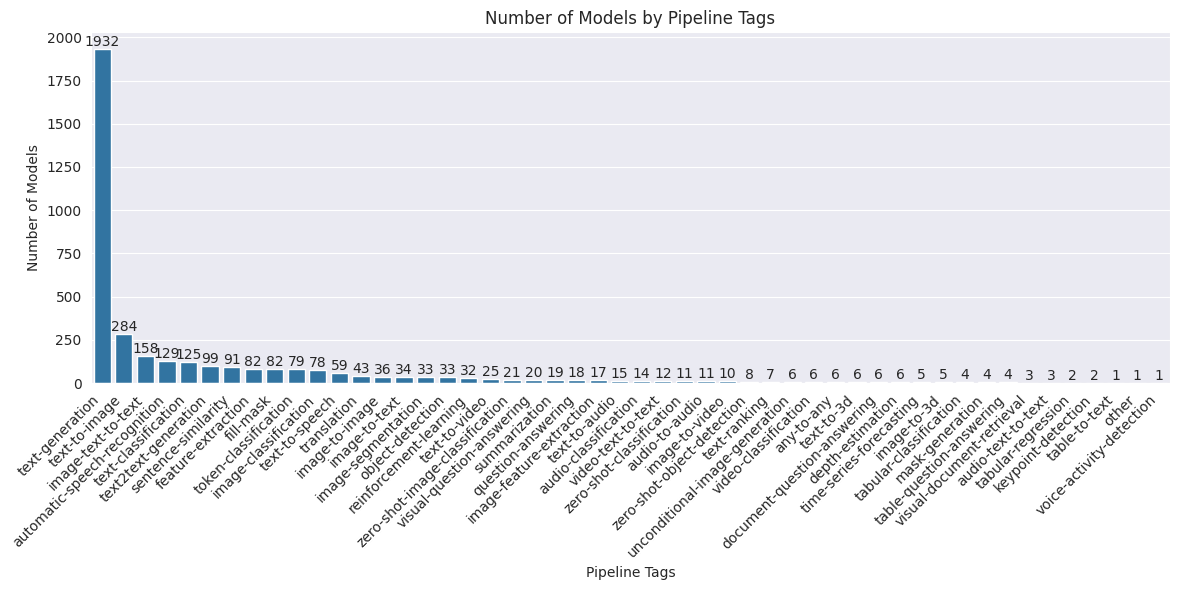

In [180]:
# show the distribution
import matplotlib.pyplot as plt
import seaborn as sns

model_tags = hf_api.get_model_tags()
pipeline_tags = model_tags["pipeline_tag"]
subtype = set()
for tag in pipeline_tags:
    subtype.add(tag["subType"])
    # print(tag)
print("Subtypes:", subtype)

groups = dict.fromkeys(subtype)
for tag in pipeline_tags:
    if not groups[tag["subType"]]:
        groups[tag["subType"]] = []
    groups[tag["subType"]].append(tag["id"])
print(groups)

# Map pipeline_tags to their group based on the 'groups' dictionary
def map_tag_to_group(tag):
    tag = str(tag).strip().lower().replace(" ", "-")
    for group, tags in groups.items():
        if tag in tags:
            return group
    return "Not Provided"

hf['pipeline_group'] = hf['pipeline_tag'].apply(map_tag_to_group)

pipeline_group_counts = hf.groupby('pipeline_group')['model_id'].nunique().reset_index()
# pipeline_group_counts_filtered = hf[hf['pipeline_group'] != "Not Provided"].groupby('pipeline_group')['model_id'].nunique().reset_index()
pipeline_group_counts_filtered = hf.groupby('pipeline_group')['model_id'].nunique().reset_index()

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=pipeline_group_counts_filtered.sort_values('model_id', ascending=False),
    x='pipeline_group',
    y='model_id',
)
plt.title('Number of Models by Task Type')
plt.xlabel('Task')
plt.ylabel('Number of Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10)
plt.show()
plt.show()
pipeline_group_counts = hf.groupby('pipeline_tag')['model_id'].nunique().reset_index()
# pipeline_group_counts = rq_df[rq_df['pipeline_group'] != "Not Provided"].groupby('pipeline_group')['model_id'].nunique().reset_index()

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=pipeline_group_counts.sort_values('model_id', ascending=False),
    x='pipeline_tag',
    y='model_id',
)
plt.title('Number of Models by Pipeline Tags')
plt.xlabel('Pipeline Tags')
plt.ylabel('Number of Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10)
plt.show()
plt.show()



In [165]:
import numpy as np
# Count number of models per (pipeline_group, pipeline_tag)
tag_counts = (
    hf.groupby(['pipeline_group', 'pipeline_tag'])['model_id']
    .nunique()
    .reset_index()
    .rename(columns={'model_id': 'model_count'})
)

# Sort by group then descending count
tag_counts = tag_counts.sort_values(['pipeline_group', 'model_count'], ascending=[True, False])
# tag_counts= tag_counts.reset_index()
tag_counts = tag_counts.set_index(["pipeline_group","pipeline_tag"])
tag_counts

model_count
pipeline_group pipeline_tag                               
Not Provided   other                                     1
               table-to-text                             1
audio          automatic-speech-recognition            129
               text-to-speech                           59
               text-to-audio                            15
               audio-classification                     14
               audio-to-audio                           11
               voice-activity-detection                  1
cv             text-to-image                           284
               image-classification                     78
               image-to-image                           36
               image-to-text                            34
               image-segmentation                       33
               object-detection                         33
               text-to-video                            25
               zero-shot-image-classification           21
               image-feature-extraction                 17
               image-to-video                           10
               zero-shot-object-detection                8
               depth-estimation                          6
               text-to-3d                                6
               unconditional-image-generation            6
               video-classification                      6
               image-to-3d                               5
               mask-generation                           4
               keypoint-detection                        2
multimodal     image-text-to-text                      158
               visual-question-answering                20
               video-text-to-text                       12
               any-to-any                                6
               document-question-answering               6
               audio-text-to-text                        3
               visual-document-retrieval                 3
nlp            text-generation                        1932
               text-classification                     125
               text2text-generation                     99
               sentence-similarity                      91
               feature-extraction                       82
               fill-mask                                82
               token-classification                     79
               translation                              43
               summarization                            19
               question-answering                       18
               zero-shot-classification                 11
               text-ranking                              7
               table-question-answering                  4
rl             reinforcement-learning                   32
tabular        time-series-forecasting                   5
               tabular-classification                    4
               tabular-regression                        2

In [166]:
tag_counts.index.get_level_values(level=0)

Index(['Not Provided', 'Not Provided', 'audio', 'audio', 'audio', 'audio',
       'audio', 'audio', 'cv', 'cv', 'cv', 'cv', 'cv', 'cv', 'cv', 'cv', 'cv',
       'cv', 'cv', 'cv', 'cv', 'cv', 'cv', 'cv', 'cv', 'cv', 'multimodal',
       'multimodal', 'multimodal', 'multimodal', 'multimodal', 'multimodal',
       'multimodal', 'nlp', 'nlp', 'nlp', 'nlp', 'nlp', 'nlp', 'nlp', 'nlp',
       'nlp', 'nlp', 'nlp', 'nlp', 'nlp', 'rl', 'tabular', 'tabular',
       'tabular'],
      dtype='object', name='pipeline_group')

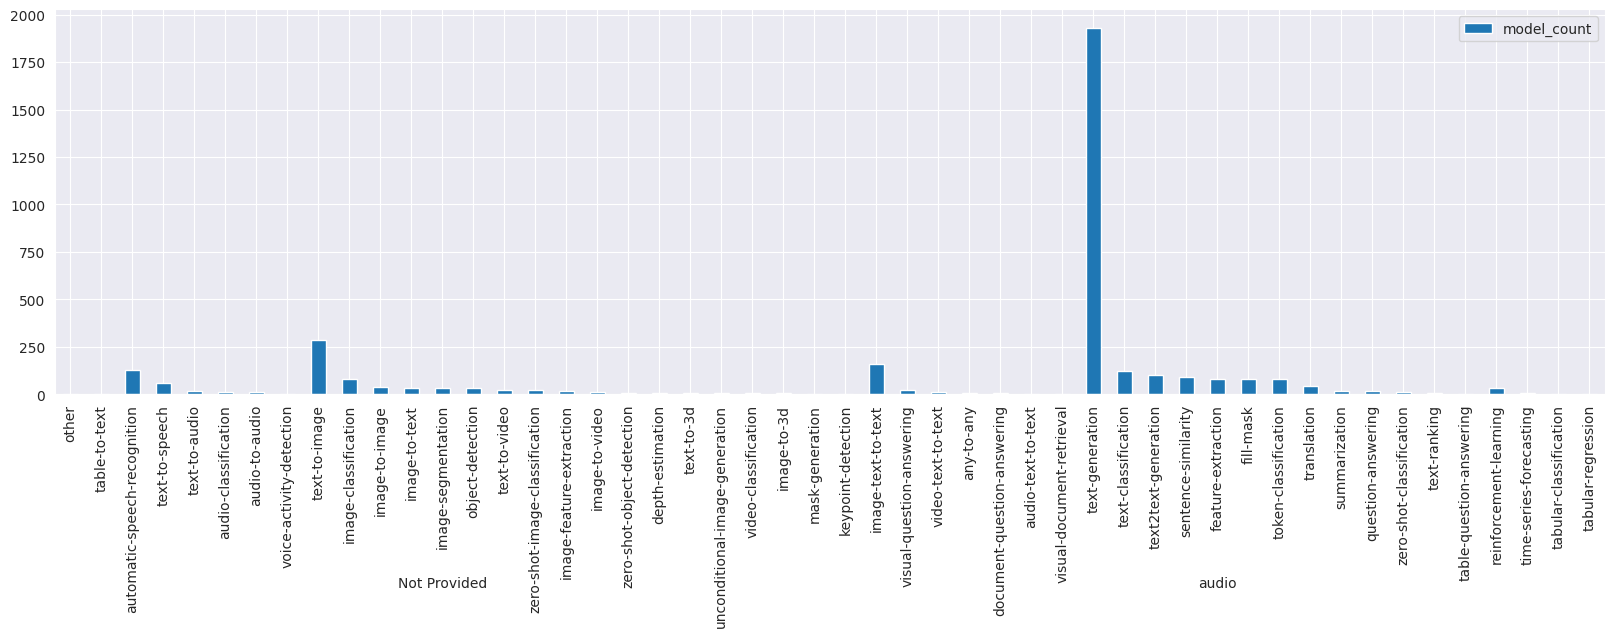

In [177]:

fig, ax = plt.subplots(1,figsize=(20,5))
tag_counts.plot(kind='bar', xlabel='', ax=ax)
ax.set_xticklabels(tag_counts.index.get_level_values(level=1).tolist(), rotation=90)

for container in ax.containers:
    for i,child in enumerate(container.get_children()):
        if i == 0:
            ax.text(child.xy[0]+child.get_width(), -0.5, tag_counts.index.get_level_values(level=0)[0], ha='center', transform=ax.transAxes)
        elif i == 2:
            ax.text(child.xy[0]-(child.get_width()*2), -0.5, tag_counts.index.get_level_values(level=0)[2], ha='center', transform=ax.transAxes)

plt.show()

In [181]:
tag_counts = (
    hf.groupby(['pipeline_group', 'pipeline_tag'])['model_id']
    .nunique()
    .reset_index()
    .rename(columns={'model_id': 'model_count'})
)
tag_counts.set_index(["pipeline_group","pipeline_tag"])
tag_counts

,pipeline_group,pipeline_tag,model_count
0,Not Provided,other,1
1,Not Provided,table-to-text,1
2,audio,audio-classification,14
3,audio,audio-to-audio,11
4,audio,automatic-speech-recognition,129
5,audio,text-to-audio,15
6,audio,text-to-speech,59
7,audio,voice-activity-detection,1
8,cv,depth-estimation,6
9,cv,image-classification,78


In [185]:
hf

,Unnamed: 0,model_id,discussion_count,discussions,discussions_count,pipeline_tag,pipeline_group
0,0,01-ai/Yi-1.5-34B-Chat,3,"[3, 6, 14]",3,text-generation,nlp
1,1,01-ai/Yi-1.5-34B-Chat-16K,1,[2],1,text-generation,nlp
2,2,01-ai/Yi-1.5-9B-Chat,2,"[2, 4]",2,text-generation,nlp
3,3,01-ai/Yi-1.5-9B-Chat-16K,1,[1],1,text-generation,nlp
4,4,01-ai/Yi-34B,4,"[6, 18, 33, 35]",4,text-generation,nlp
...,...,...,...,...,...,...,...
4631,4631,zhihan1996/DNABERT-S,1,[1],1,feature-extraction,nlp
4632,4632,zhiqings/dromedary-65b-lora-delta-v0,1,[1],1,NaN,Not Provided
4633,4633,zl111/ChatDoctor,1,[4],1,text-generation,nlp
4634,4634,zxhezexin/openlrm-large-obj-1.0,1,[1],1,image-to-3d,cv


In [ ]:
hf_api= huggingface_hub.HfApi()

def get_base_model(row):
    base_model_from_card = ""
    adapter = 0
    merge = 0
    quantized = 0
    finetune = 0
    base_or_downstream = "unknown"

    try:
        model_info_expand = hf_api.model_info(
            row["model_id"],
            expand=[
                "baseModels",
                "childrenModelCount",
                "downloadsAllTime",
                "trendingScore",
                "cardData",
                "tags"
            ]
        )

        card_data_dict = model_info_expand.card_data.to_dict() if model_info_expand.card_data else None
        if card_data_dict:
            card_data_dict = {
                k: v for k, v in card_data_dict.items()
                if not (any(x in k for x in ["extra_gated", "widget"]))  # remove this to save space
            }

        # base model can comes from tags or model cards
        base_model_from_card = None
        if card_data_dict:
            base_model_from_card = card_data_dict.get("base_model")

        chains = dict(model_info_expand.childrenModelCount)
        adapter = chains.get("adapter", 0)
        merge = chains.get("merge", 0)
        quantized = chains.get("quantized", 0)
        finetune = chains.get("finetune", 0)

        if base_model_from_card:
            base_or_downstream = 'downstream'
        else:
            if adapter > 0 or merge > 0 or quantized > 0 or finetune > 0:
                base_or_downstream = 'base'
            else:
                base_or_downstream = 'unknown'

    except Exception as e:
        print(e)

    print(base_model_from_card, adapter, merge, quantized, finetune, base_or_downstream)
    return base_model_from_card, adapter, merge, quantized, finetune, base_or_downstream

hf[["base_model_from_card_data", "adapter", "merge", "quantized", "finetune", "base_or_downstream"]] = hf.apply(get_base_model, axis=1, result_type="expand")
hf.to_csv("./model_base.csv")
hf

In [196]:
hf

,Unnamed: 0,model_id,discussion_count,discussions,discussions_count,pipeline_tag,pipeline_group,base_model_from_card_data,adapter,merge,quantized,finetune,base_or_downstream
0,0,01-ai/Yi-1.5-34B-Chat,3,"[3, 6, 14]",3,text-generation,nlp,None,0,9,20,6,base
1,1,01-ai/Yi-1.5-34B-Chat-16K,1,[2],1,text-generation,nlp,None,0,0,10,0,base
2,2,01-ai/Yi-1.5-9B-Chat,2,"[2, 4]",2,text-generation,nlp,None,104,1,21,16,base
3,3,01-ai/Yi-1.5-9B-Chat-16K,1,[1],1,text-generation,nlp,None,249,0,12,8,base
4,4,01-ai/Yi-34B,4,"[6, 18, 33, 35]",4,text-generation,nlp,None,3,2,8,11,base
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4631,4631,zhihan1996/DNABERT-S,1,[1],1,feature-extraction,nlp,None,0,0,0,1,base
4632,4632,zhiqings/dromedary-65b-lora-delta-v0,1,[1],1,NaN,Not Provided,None,0,0,0,0,unknown
4633,4633,zl111/ChatDoctor,1,[4],1,text-generation,nlp,None,0,0,0,0,unknown
4634,4634,zxhezexin/openlrm-large-obj-1.0,1,[1],1,image-to-3d,cv,None,0,0,0,0,unknown


In [201]:
hf["base_or_downstream"].value_counts()

base_or_downstream
unknown       2103
base          1446
downstream    1087
Name: count, dtype: int64

In [220]:
hf_sec_count = hf[['base_or_downstream',"discussion_count"]].groupby('base_or_downstream')["discussion_count"].sum()
hf_sec_count

base_or_downstream
base          3681
downstream    1832
unknown       2854
Name: discussion_count, dtype: int64

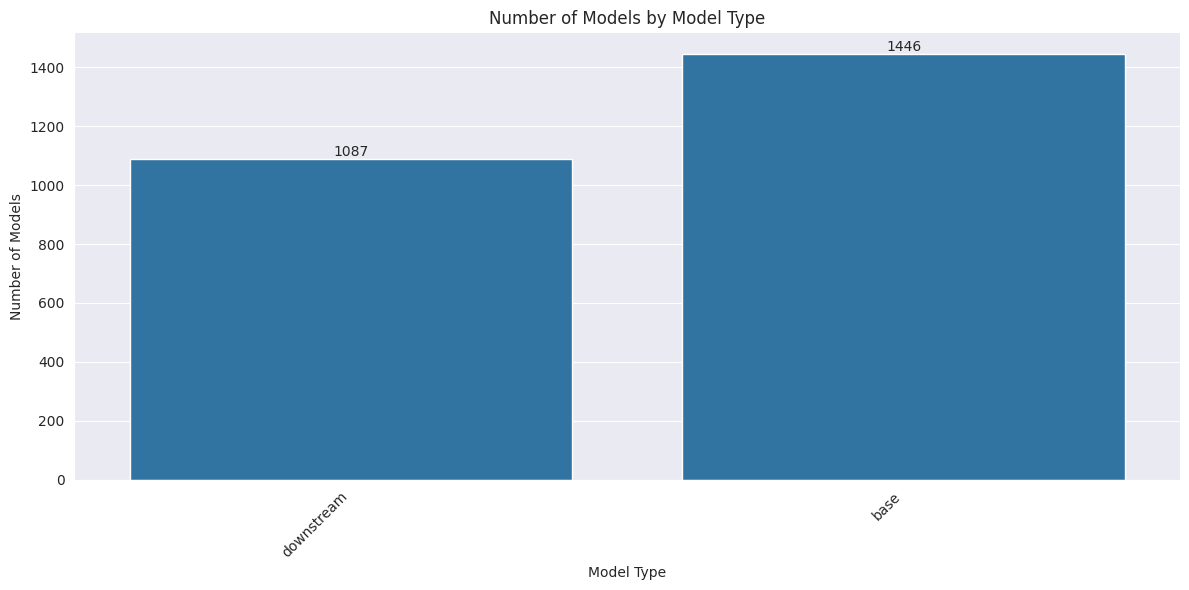

In [200]:

# base_model_pipeline_group_counts = rq_df.groupby('is_base_model')['model_id'].nunique().reset_index()
base_model_pipeline_group_counts = hf[hf['base_or_downstream'] != 'unknown'].groupby('base_or_downstream')['model_id'].nunique().reset_index()

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=base_model_pipeline_group_counts.sort_values('base_or_downstream', ascending=False),
    x='base_or_downstream',
    y='model_id',
)
plt.title('Number of Models by Model Type')
plt.xlabel('Model Type')
plt.ylabel('Number of Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10)
plt.show()
plt.show()
